In [ ]:
Case study on unsupervised learning

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

/home/nandu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nandu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nandu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nandu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

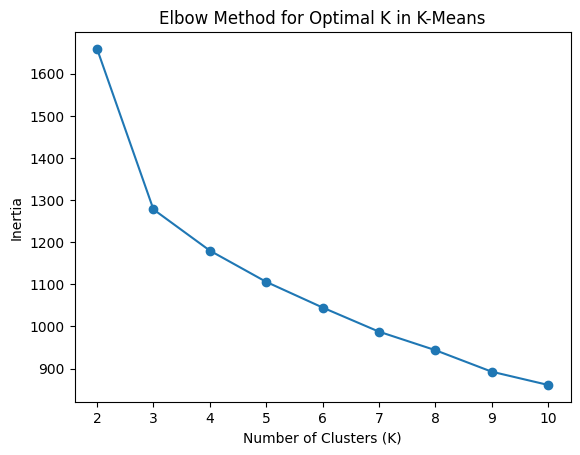

/home/nandu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nandu/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


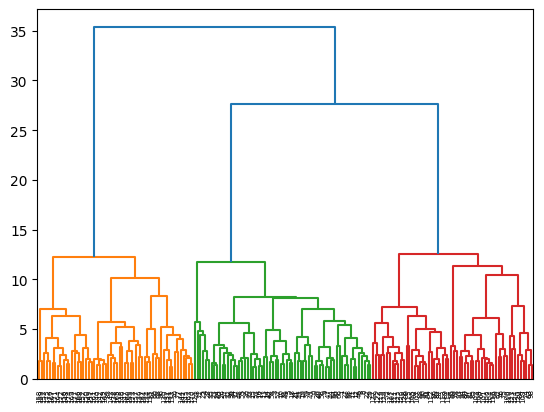

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load the dataset from CSV
file_path = '/home/nandu/Downloads/Wine_clust .csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Feature selection and scaling
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
            'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
            'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    kmeans_scores.append(kmeans.inertia_)

# Elbow method to find optimal K for K-Means
plt.plot(range(2, 11), kmeans_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K in K-Means')
plt.show()

# Choose the optimal K from the elbow method and create K-Means model
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k)
kmeans_optimal.fit(X_scaled)
data['KMeans_Labels'] = kmeans_optimal.labels_

# Hierarchical clustering
# Create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Choose the optimal number of clusters from the dendrogram
optimal_clusters = 3
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
data['Hierarchical_Labels'] = hc.fit_predict(X_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Labels'] = dbscan.fit_predict(X_scaled)

# Evaluate the clustering models
# ...

# Visualize the clusters
# ...
